# 데이터 전처리 (데이터 구분자 정리)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 23)
pd.set_option('display.max_rows', False)
pd.set_option('display.width', False)

%matplotlib inline

In [20]:
df = pd.read_csv("서울특별시_전월세가_정보_20190916.csv", delimiter = 'kk', encoding = 'CP949', header = None)

C:\Users\Yeonjoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
# colab 버전
#from google.colab import auth
#auth.authenticate_user()

#from google.colab import drive
#drive.mount('/content/gdrive')

In [21]:
df.head()

,0
0,"""지번코드"",""기관코드"",""일련번호"",""접수년도"",""자치구코드"",""자치구명"",""법정..."
1,"""1111010100100740001"",""3000136"",""0000457"",""201..."
2,"""1111010100100010000"",""3000136"",""0000485"",""201..."
3,"""1111010100100560041"",""3000136"",""0000005"",""201..."
4,"""1111010100100500010"",""3000136"",""0000505"",""201..."


In [22]:
df[0]=df[0].str.replace(';',',')
df[0]=df[0].str.replace('","','*')
df[0]=df[0].str.replace('"','')

In [23]:
df.head()

,0
0,지번코드*기관코드*일련번호*접수년도*자치구코드*자치구명*법정동코드*법정동명*본번*부...
1,1111010100100740001*3000136*0000457*2015*11110...
2,1111010100100010000*3000136*0000485*2015*11110...
3,1111010100100560041*3000136*0000005*2016*11110...
4,1111010100100500010*3000136*0000505*2015*11110...


In [24]:
df1 = df[0].str.split('*',expand=True)

In [9]:
#df1 = df1.iloc[:,:22]

In [25]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,지번코드,기관코드,일련번호,접수년도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,건물명,층,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,계약년도,계약일자,건축년도
1,1111010100100740001,3000136,0000457,2015,11110,종로구,10100,청운동,0074,0001,우진빌딩,2,4,다세대/연립,82.69,1,전세,34000,0,2015,20150623,1991
2,1111010100100010000,3000136,0000485,2015,11110,종로구,10100,청운동,0001,0000,청운벽산빌리지,2,4,다세대/연립,83.61,3,준월세,5000,120,2015,20150703,1988
3,1111010100100560041,3000136,0000005,2016,11110,종로구,10100,청운동,0056,0041,MJ하이빌,3,4,다세대/연립,75,1,전세,35000,0,2015,20150921,2007
4,1111010100100500010,3000136,0000505,2015,11110,종로구,10100,청운동,0050,0010,글로리아파크,2,4,다세대/연립,79.14,1,전세,38000,0,2015,20150822,2002


In [26]:
df2 = df1.rename(columns = df1.iloc[0])

In [27]:
df3 = df2.drop(df2.index[0]).reset_index(drop = True)

# 전세 데이터만 추출

In [28]:
df3['전월세구분'].value_counts()

전세     2028498
준월세     875517
준전세     265795
월세      111111
Name: 전월세구분, dtype: int64

In [30]:
df3[df3.전월세구분 == '전세']

,지번코드,기관코드,일련번호,접수년도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,건물명,층,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,계약년도,계약일자,건축년도
0,1111010100100740001,3000136,0000457,2015,11110,종로구,10100,청운동,0074,0001,우진빌딩,2,4,다세대/연립,82.69,1,전세,34000,0,2015,20150623,1991
2,1111010100100560041,3000136,0000005,2016,11110,종로구,10100,청운동,0056,0041,MJ하이빌,3,4,다세대/연립,75,1,전세,35000,0,2015,20150921,2007
3,1111010100100500010,3000136,0000505,2015,11110,종로구,10100,청운동,0050,0010,글로리아파크,2,4,다세대/연립,79.14,1,전세,38000,0,2015,20150822,2002
4,1111010100100520018,3000136,0000637,2015,11110,종로구,10100,청운동,0052,0018,귀빈하우스,2,4,다세대/연립,102.4,1,전세,43000,0,2015,20150902,2000
6,1111010100100520018,3000136,0000129,2018,11110,종로구,10100,청운동,0052,0018,귀빈하우스,2,4,다세대/연립,102.4,1,전세,43000,0,2015,20150902,2000
7,1111010100100890005,3000136,0000038,2016,11110,종로구,10100,청운동,0089,0005,아트빌,3,4,다세대/연립,84.73,1,전세,48000,0,2015,20151229,2002
8,1111010100100010000,3000136,0000698,2015,11110,종로구,10100,청운동,0001,0000,청운벽산빌리지,1,4,다세대/연립,187.49,1,전세,62000,0,2015,20151214,1988
9,1111010100100560041,3000136,0000066,2016,11110,종로구,10100,청운동,0056,0041,MJ하이빌,2,4,다세대/연립,74.97,1,전세,35000,0,2015,20151222,2007
10,1111010100100010000,3000136,0000708,2015,11110,종로구,10100,청운동,0001,0000,청운벽산빌리지,2,4,다세대/연립,141.39,1,전세,45000,0,2015,20151229,1988
11,1111010100100890005,3000136,0000619,2015,11110,종로구,10100,청운동,0089,0005,아트빌,1,4,다세대/연립,84.82,1,전세,45000,0,2015,20151021,2002


In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280921 entries, 0 to 3280920
Data columns (total 22 columns):
지번코드       object
기관코드       object
일련번호       object
접수년도       object
자치구코드      object
자치구명       object
법정동코드      object
법정동명       object
본번         object
부번         object
건물명        object
층          object
임대건물코드     object
임대건물명      object
임대면적       object
전월세구분코드    object
전월세구분      object
보증금        object
임대료        object
계약년도       object
계약일자       object
건축년도       object
dtypes: object(22)
memory usage: 550.7+ MB


In [32]:
전세 = df3[df3['전월세구분'] == '전세']

In [73]:
전세.head()

,지번코드,기관코드,일련번호,접수년도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,건물명,층,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,계약년도,계약일자,건축년도
0,1111010100100740001,3000136,0000457,2015,11110,종로구,10100,청운동,0074,0001,우진빌딩,2,4,다세대/연립,82.69,1,전세,34000,0,2015,20150623,1991
2,1111010100100560041,3000136,0000005,2016,11110,종로구,10100,청운동,0056,0041,MJ하이빌,3,4,다세대/연립,75,1,전세,35000,0,2015,20150921,2007
3,1111010100100500010,3000136,0000505,2015,11110,종로구,10100,청운동,0050,0010,글로리아파크,2,4,다세대/연립,79.14,1,전세,38000,0,2015,20150822,2002
4,1111010100100520018,3000136,0000637,2015,11110,종로구,10100,청운동,0052,0018,귀빈하우스,2,4,다세대/연립,102.4,1,전세,43000,0,2015,20150902,2000
6,1111010100100520018,3000136,0000129,2018,11110,종로구,10100,청운동,0052,0018,귀빈하우스,2,4,다세대/연립,102.4,1,전세,43000,0,2015,20150902,2000


In [103]:
전세.to_csv("./seoul_house_200701_201906_final_data.csv" , index=False, encoding = 'utf-8')

In [2]:
#전세 = pd.read_csv("./seoul_house_200701_201906_final_data.csv" , encoding = 'utf-8')

C:\Users\Yeonjoo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
전세.head()

,지번코드,기관코드,일련번호,접수년도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,건물명,층,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,계약년도,계약일자,건축년도
0,1111010100100740001,3000136,0000457,2015,11110,종로구,10100,청운동,0074,0001,우진빌딩,2,4,다세대/연립,82.69,1,전세,34000,0,2015,20150623,1991
2,1111010100100560041,3000136,0000005,2016,11110,종로구,10100,청운동,0056,0041,MJ하이빌,3,4,다세대/연립,75,1,전세,35000,0,2015,20150921,2007
3,1111010100100500010,3000136,0000505,2015,11110,종로구,10100,청운동,0050,0010,글로리아파크,2,4,다세대/연립,79.14,1,전세,38000,0,2015,20150822,2002
4,1111010100100520018,3000136,0000637,2015,11110,종로구,10100,청운동,0052,0018,귀빈하우스,2,4,다세대/연립,102.4,1,전세,43000,0,2015,20150902,2000
6,1111010100100520018,3000136,0000129,2018,11110,종로구,10100,청운동,0052,0018,귀빈하우스,2,4,다세대/연립,102.4,1,전세,43000,0,2015,20150902,2000


In [34]:
for col in 전세:
    print(col , ':' ,  전세[col].unique().size , '/' , 전세[col].size)

지번코드 : 87757 / 2028498
기관코드 : 601 / 2028498
일련번호 : 17734 / 2028498
접수년도 : 10 / 2028498
자치구코드 : 35 / 2028498
자치구명 : 26 / 2028498
법정동코드 : 84 / 2028498
법정동명 : 407 / 2028498
본번 : 1824 / 2028498
부번 : 1334 / 2028498
건물명 : 66741 / 2028498
층 : 74 / 2028498
임대건물코드 : 4 / 2028498
임대건물명 : 4 / 2028498
임대면적 : 17308 / 2028498
전월세구분코드 : 1 / 2028498
전월세구분 : 1 / 2028498
보증금 : 5175 / 2028498
임대료 : 4 / 2028498
계약년도 : 13 / 2028498
계약일자 : 3108 / 2028498
건축년도 : 114 / 2028498


# 분석에 필요한 항목만 추출

In [35]:
new_data = 전세[['지번코드','기관코드','일련번호','접수년도','자치구코드','법정동코드'
               ,'본번','부번','층','임대건물코드','임대면적','계약년도','계약일자','건축년도','보증금']]

In [36]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2028498 entries, 0 to 3280918
Data columns (total 15 columns):
지번코드      object
기관코드      object
일련번호      object
접수년도      object
자치구코드     object
법정동코드     object
본번        object
부번        object
층         object
임대건물코드    object
임대면적      object
계약년도      object
계약일자      object
건축년도      object
보증금       object
dtypes: object(15)
memory usage: 247.6+ MB


In [37]:
new_data.count()

지번코드      2028498
기관코드      2028498
일련번호      2028498
접수년도      2028498
자치구코드     2028498
법정동코드     2028498
본번        2028498
부번        2028498
층         2028498
임대건물코드    2028498
임대면적      2028498
계약년도      2028498
계약일자      2028498
건축년도      2028498
보증금       2028498
dtype: int64

In [38]:
#전체 데이터 수치형 변경
data = new_data.apply(pd.to_numeric, errors = 'coerce')
#data = new_data

In [39]:
data.head()

,지번코드,기관코드,일련번호,접수년도,자치구코드,법정동코드,본번,부번,층,임대건물코드,임대면적,계약년도,계약일자,건축년도,보증금
0,1.111010e+18,3000136,457,2015,11110,10100,74.0,1.0,2.0,4,82.69,2015,20150623,1991.0,34000
2,1.111010e+18,3000136,5,2016,11110,10100,56.0,41.0,3.0,4,75.00,2015,20150921,2007.0,35000
3,1.111010e+18,3000136,505,2015,11110,10100,50.0,10.0,2.0,4,79.14,2015,20150822,2002.0,38000
4,1.111010e+18,3000136,637,2015,11110,10100,52.0,18.0,2.0,4,102.40,2015,20150902,2000.0,43000
6,1.111010e+18,3000136,129,2018,11110,10100,52.0,18.0,2.0,4,102.40,2015,20150902,2000.0,43000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2028498 entries, 0 to 3280918
Data columns (total 15 columns):
지번코드      float64
기관코드      int64
일련번호      int64
접수년도      int64
자치구코드     int64
법정동코드     int64
본번        float64
부번        float64
층         float64
임대건물코드    int64
임대면적      float64
계약년도      int64
계약일자      int64
건축년도      float64
보증금       int64
dtypes: float64(6), int64(9)
memory usage: 247.6 MB


In [41]:
data.count()

지번코드      2028496
기관코드      2028498
일련번호      2028498
접수년도      2028498
자치구코드     2028498
법정동코드     2028498
본번        1499846
부번        1499846
층         1488011
임대건물코드    2028498
임대면적      2028473
계약년도      2028498
계약일자      2028498
건축년도      1986189
보증금       2028498
dtype: int64

# NaN 처리

In [42]:
data[data.층.isnull()]

,지번코드,기관코드,일련번호,접수년도,자치구코드,법정동코드,본번,부번,층,임대건물코드,임대면적,계약년도,계약일자,건축년도,보증금
32,1.111010e+09,3000136,620,2013,11110,10100,NaN,NaN,NaN,2,84.86,2013,20131026,1965.0,31000
35,1.111010e+09,3000136,119,2014,11110,10100,NaN,NaN,NaN,2,159.26,2014,20140114,1995.0,35000
61,1.111010e+18,3000136,495,2011,11110,10100,52.0,10.0,NaN,4,95.25,2011,20110917,2001.0,40000
62,1.111010e+18,3000136,549,2011,11110,10100,52.0,5.0,NaN,4,65.59,2011,20110928,2010.0,27000
65,1.111010e+09,3000136,286,2011,11110,10100,NaN,NaN,NaN,2,29.70,2011,20110529,1957.0,5600
66,1.111010e+09,3000136,252,2011,11110,10100,NaN,NaN,NaN,2,53.76,2011,20110502,1991.0,16000
69,1.111010e+09,3000136,386,2012,11110,10100,NaN,NaN,NaN,2,49.50,2011,20110503,1997.0,10500
70,1.111010e+09,3000136,357,2011,11110,10100,NaN,NaN,NaN,2,30.00,2011,20110628,1995.0,5000
71,1.111010e+09,3000136,466,2011,11110,10100,NaN,NaN,NaN,2,100.59,2011,20110915,1997.0,40000
82,1.111010e+09,3000136,591,2015,11110,10100,NaN,NaN,NaN,2,83.61,2015,20151024,1956.0,34000


In [43]:
#층이 NaN인경우는 임대건물코드가 2 (단독/다가구) 임으로 1층으로 표시
data['층'] = data['층'].fillna(1.0).astype('int32')

In [44]:
#본번,부번은 없는경우 0으로 표시
data['본번'] = data['본번'].fillna(0.0).astype('int32')
data['부번'] = data['부번'].fillna(0.0).astype('int32')

In [45]:
data.count()

지번코드      2028496
기관코드      2028498
일련번호      2028498
접수년도      2028498
자치구코드     2028498
법정동코드     2028498
본번        2028498
부번        2028498
층         2028498
임대건물코드    2028498
임대면적      2028473
계약년도      2028498
계약일자      2028498
건축년도      1986189
보증금       2028498
dtype: int64

In [46]:
data[data.임대면적.isnull()]

,지번코드,기관코드,일련번호,접수년도,자치구코드,법정동코드,본번,부번,층,임대건물코드,임대면적,계약년도,계약일자,건축년도,보증금
24096,1.111017e+18,3000055,254,2011,11110,17300,1,102,1,1,NaN,2011,20110609,1997.0,2500
354691,1.123011e+18,3050055,1235,2013,11230,10600,312,8,1,1,NaN,2013,20131130,2013.0,12000
438925,1.126010e+18,3060040,864,2012,11260,10100,1534,0,1,1,NaN,2012,20120619,2012.0,17000
884218,1.135010e+18,3100189,2006,2013,11350,10300,683,14,1,1,NaN,2013,20131116,2013.0,8000
884219,1.135010e+18,3100189,1959,2013,11350,10300,683,14,1,1,NaN,2013,20131024,2013.0,7800
885340,1.135010e+18,3100189,1816,2013,11350,10300,683,14,1,1,NaN,2013,20131014,2013.0,7500
885347,1.135010e+18,3100189,1928,2013,11350,10300,683,14,1,1,NaN,2013,20131004,2013.0,8000
1136117,1.141012e+18,3120128,97,2013,11410,11600,501,14,1,1,NaN,2013,20130117,2002.0,9000
1157689,1.141012e+18,3120132,712,2011,11410,11800,265,350,1,1,NaN,2011,20110930,2012.0,23000
1214291,1.144012e+18,3130054,1795,2012,11440,12000,490,0,1,1,NaN,2012,20120806,2012.0,70000


In [ ]:
#data[data.지번코드.isnull()]

In [48]:
data['임대면적'].median()

59.61

In [52]:
data['임대면적'] = data['임대면적'].fillna(59.61)

In [53]:
data[data.건축년도.isnull()]

,지번코드,기관코드,일련번호,접수년도,자치구코드,법정동코드,본번,부번,층,임대건물코드,임대면적,계약년도,계약일자,건축년도,보증금
122,1.111010e+09,3000136,664,2015,11110,10100,0,0,1,2,37.59,2015,20151007,NaN,15000
187,1.111010e+09,3000136,359,2015,11110,10100,0,0,1,2,18.00,2015,20150531,NaN,4000
206,1.111010e+09,3000136,618,2015,11110,10100,0,0,1,2,52.89,2015,20151104,NaN,23000
342,1.111010e+09,3000136,361,2018,11110,10100,0,0,1,2,55.00,2018,20180714,NaN,25000
380,1.111010e+09,3000136,9,2012,11110,10100,0,0,1,2,52.89,2012,20120104,NaN,15000
382,1.111010e+09,3000136,117,2012,11110,10100,0,0,1,2,68.73,2012,20120118,NaN,20000
384,1.111010e+09,3000136,206,2012,11110,10100,0,0,1,2,161.99,2012,20120217,NaN,37000
387,1.111010e+09,3000136,270,2012,11110,10100,0,0,1,2,69.69,2012,20120113,NaN,20000
399,1.111010e+09,3000136,480,2012,11110,10100,0,0,1,2,36.36,2012,20120927,NaN,17000
408,1.111010e+09,3000136,586,2012,11110,10100,0,0,1,2,52.89,2012,20121018,NaN,15000


In [54]:
data['건축년도'].median()

1999.0

In [55]:
data['건축년도'] = data['건축년도'].fillna(1999.0).astype('int32')

In [56]:
data[data['접수년도']!= data['계약년도']]

,지번코드,기관코드,일련번호,접수년도,자치구코드,법정동코드,본번,부번,층,임대건물코드,임대면적,계약년도,계약일자,건축년도,보증금
2,1.111010e+18,3000136,5,2016,11110,10100,56,41,3,4,75.00,2015,20150921,2007,35000
6,1.111010e+18,3000136,129,2018,11110,10100,52,18,2,4,102.40,2015,20150902,2000,43000
7,1.111010e+18,3000136,38,2016,11110,10100,89,5,3,4,84.73,2015,20151229,2002,48000
9,1.111010e+18,3000136,66,2016,11110,10100,56,41,2,4,74.97,2015,20151222,2007,35000
13,1.111010e+18,3000136,4,2016,11110,10100,52,4,2,4,162.01,2015,20151118,1995,50000
14,1.111010e+18,3000136,14,2016,11110,10100,89,5,1,4,84.73,2015,20151204,2002,45000
15,1.111010e+18,3000136,71,2016,11110,10100,52,5,4,4,65.59,2015,20151218,2010,34000
16,1.111010e+18,3000136,306,2016,11110,10100,56,74,2,4,100.35,2015,20151031,1995,28000
30,1.111010e+18,3000136,27,2013,11110,10100,56,45,2,1,129.76,2012,20121221,2000,50000
36,1.111010e+18,3000136,15,2013,11110,10100,56,45,5,1,78.78,2012,20121205,2000,33000


In [87]:
final = data.dropna(how = 'any').reset_index(drop=True)

In [88]:
final.count()

지번코드      2028496
기관코드      2028496
일련번호      2028496
접수년도      2028496
자치구코드     2028496
법정동코드     2028496
본번        2028496
부번        2028496
층         2028496
임대건물코드    2028496
임대면적      2028496
계약년도      2028496
계약일자      2028496
건축년도      2028496
보증금       2028496
dtype: int64

In [89]:
final.corr()

,지번코드,기관코드,일련번호,접수년도,자치구코드,법정동코드,본번,부번,층,임대건물코드,임대면적,계약년도,계약일자,건축년도,보증금
지번코드,1.000000,0.068134,0.003061,0.004159,0.138585,-0.035285,0.464765,0.101437,0.470551,0.078897,0.279988,0.015820,0.016063,0.165548,0.426412
기관코드,0.068134,1.000000,-0.006168,-0.166090,0.095251,-0.030958,0.028750,0.009495,0.012291,-0.022461,0.067369,-0.171325,-0.171424,-0.023471,0.020669
일련번호,0.003061,-0.006168,1.000000,0.014912,0.001438,-0.001125,0.002484,-0.000547,0.000659,0.003673,-0.003120,0.015662,0.015731,0.004226,0.001514
접수년도,0.004159,-0.166090,0.014912,1.000000,0.008342,-0.008082,0.007682,-0.003932,0.009365,0.075254,-0.096671,0.983734,0.984212,0.105127,0.207245
자치구코드,0.138585,0.095251,0.001438,0.008342,1.000000,-0.288118,0.051453,-0.062025,0.047550,0.015476,0.059710,0.010147,0.010278,0.005602,0.176763
법정동코드,-0.035285,-0.030958,-0.001125,-0.008082,-0.288118,1.000000,-0.002938,0.044854,0.002397,0.012991,0.020739,-0.008097,-0.008115,0.005745,0.003814
본번,0.464765,0.028750,0.002484,0.007682,0.051453,-0.002938,1.000000,-0.005059,0.297500,-0.061988,0.173283,0.012275,0.012385,0.123316,0.235046
부번,0.101437,0.009495,-0.000547,-0.003932,-0.062025,0.044854,-0.005059,1.000000,-0.062247,0.148999,-0.056145,-0.002156,-0.002220,0.032170,-0.062427
층,0.470551,0.012291,0.000659,0.009365,0.047550,0.002397,0.297500,-0.062247,1.000000,-0.200724,0.325479,0.013627,0.013876,0.122132,0.478387
임대건물코드,0.078897,-0.022461,0.003673,0.075254,0.015476,0.012991,-0.061988,0.148999,-0.200724,1.000000,-0.387485,0.080742,0.080621,0.176850,-0.302439


In [74]:
import numpy as np
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy import stats
%matplotlib inline
plt.style.use('classic')

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 


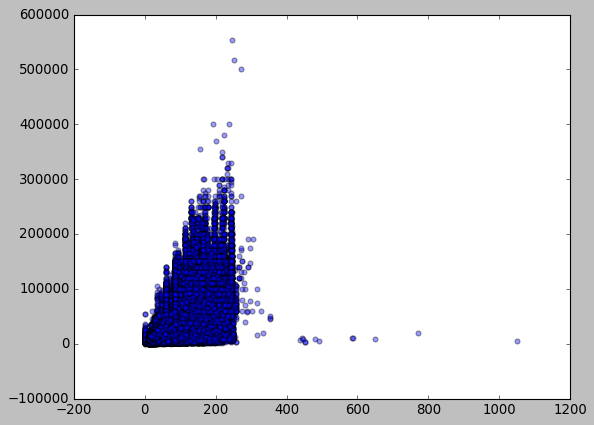

In [91]:
plt.scatter(final['임대면적'], final['보증금'], alpha=0.4)
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
x = final.iloc[:,1:-1]
y = final['보증금']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [99]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
y_predicted = mlr.predict(x_test)

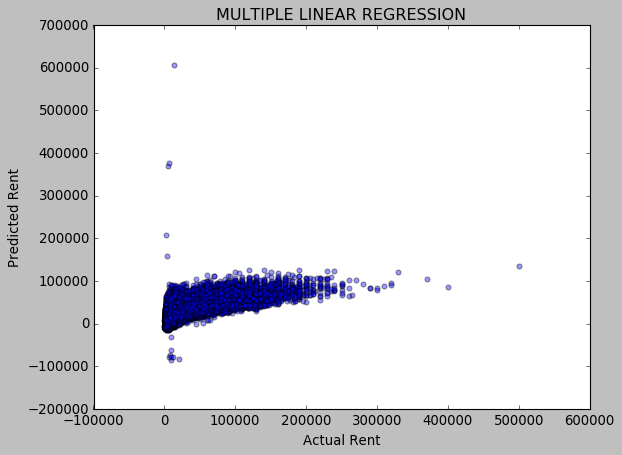

In [101]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predicted, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [102]:
print(mlr.score(x_train, y_train))

0.6221152044814846
